In [0]:
#import pandas as pd
#data=pd.read_csv('hindi-train.csv', sep="\t",encoding='utf-8', header=None)
#data=data.drop(data.columns[0],1)
#data.to_csv('newfile.txt',index=False)
#data.head()

In [0]:
filename = "/content/drive/My Drive/Major Project/D21.txt"
data = open(filename, 'r', encoding='utf-8').read()


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional
from keras.layers import Embedding

In [0]:
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
	in_text = seed_text
    # generate a fixed number of words
	for _ in range(n_words):
        # encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# pre-pad sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
		# predict probabilities for each word
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
	return in_text

In [0]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

In [0]:

# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
	sequence = encoded[i-2:i+1]
	sequences.append(sequence)


Vocabulary Size: 2573


In [0]:
print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

Total Sequences: 14522
Max Sequence Length: 3


In [0]:
# split into input and output elements
from numpy import array

sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]

#print(X)
y = to_categorical(y, num_classes=vocab_size)
#print(y)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))

model2=Sequential()
model2.add(Embedding(vocab_size, 10, input_length=max_length-1))
model2.add(Bidirectional(LSTM(50)))
model2.add(Dense(vocab_size, activation='softmax'))

In [0]:
print(model.summary())
print(model2.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# fit network
#model.fit(X, y, epochs=250, verbose=2)
history = model.fit(X, y,  epochs=250, verbose=2)
history2=model2.fit(X,y,epochs=250,verbose=2)


# evaluate model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 2, 10)             25730     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_5 (Dense)              (None, 2573)              131223    
Total params: 169,153
Trainable params: 169,153
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 2, 10)             25730     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               24400     
_____________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/250
 - 3s - loss: 6.9638 - accuracy: 0.0272
Epoch 2/250
 - 3s - loss: 6.5213 - accuracy: 0.0281
Epoch 3/250
 - 3s - loss: 6.4753 - accuracy: 0.0281
Epoch 4/250
 - 3s - loss: 6.4447 - accuracy: 0.0281
Epoch 5/250
 - 3s - loss: 6.4169 - accuracy: 0.0281
Epoch 6/250
 - 3s - loss: 6.3813 - accuracy: 0.0284
Epoch 7/250
 - 3s - loss: 6.3406 - accuracy: 0.0281
Epoch 8/250
 - 3s - loss: 6.2929 - accuracy: 0.0300
Epoch 9/250
 - 3s - loss: 6.2347 - accuracy: 0.0341
Epoch 10/250
 - 3s - loss: 6.1748 - accuracy: 0.0374
Epoch 11/250
 - 3s - loss: 6.1143 - accuracy: 0.0400
Epoch 12/250
 - 3s - loss: 6.0495 - accuracy: 0.0447
Epoch 13/250
 - 3s - loss: 5.9841 - accuracy: 0.0465
Epoch 14/250
 - 3s - loss: 5.9177 - accuracy: 0.0484
Epoch 15/250
 - 3s - loss: 5.8488 - accuracy: 0.0503
Epoch 16/250
 - 3s - loss: 5.7736 - accuracy: 0.0540
Epoch 17/250
 - 3s - loss: 5.6947 - accuracy: 0.0582
Epoch 18/250
 - 3s - loss: 5.6157 - accuracy: 0.0599
Epoch 19/250
 - 3s - loss: 5.5355 - accuracy: 0.0662
Ep

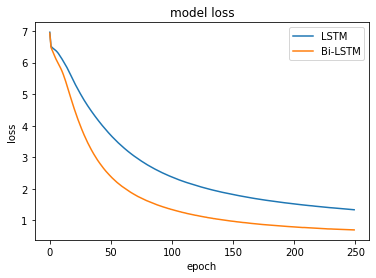

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['LSTM','Bi-LSTM'], loc='upper right')
plt.show()

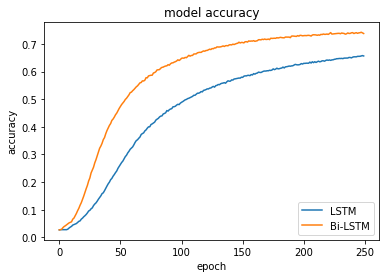

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LSTM', 'Bi-LSTM'], loc='lower right')
plt.show()

In [0]:
print(generate_seq(model, tokenizer, max_length-1, 'उनके इलाज', 2))
print(generate_seq(model, tokenizer, max_length-1, 'एक साथ खड़े', 2))
print(generate_seq(model2, tokenizer, max_length-1, 'उनके इलाज', 2))
print(generate_seq(model2, tokenizer, max_length-1, 'एक साथ खड़े', 2))

उनके इलाज कैसे आए
एक साथ खड़े प्रयोग किया
उनके इलाज तक नहीं
एक साथ खड़े प्रयोग किया
